In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

# TDI challenge - Project

* [Plot no. 1](#plot1) : Number of openings for data scientists in US as function of the location

* [Plot no. 2](#plot2) : Number of openings for data scientists in US as function of time

* [Plot no. 3](#plot3) : Percentage of job openings at Apple

# Load dataset

In [2]:
df = pd.read_csv("datasets/temp_datalab_records_job_listings1_reduced.csv", nrows=None)
df.dtypes

Unnamed: 0              int64
dataset_id              int64
listing_id             object
domain                 object
as_of_date             object
title                  object
url                    object
brand                  object
category               object
locality               object
region                 object
country                object
number_of_openings    float64
date_added             object
date_updated           object
posted_date            object
location_string        object
description           float64
entity_id             float64
city_lat              float64
city_lng              float64
cusip                 float64
isin                  float64
dtype: object

In [3]:
print "Dataset memory usage = %i MB" % (df.memory_usage(index=True).sum() / 1e6)

Dataset memory usage = 1840 MB


# Job posted : geographic dependency 
<a id='plot1'></a>

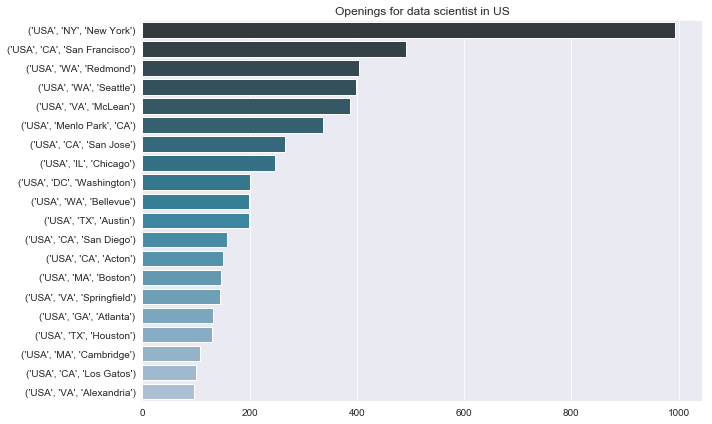

In [4]:
key = 'data scientist'
mask = df["title"].str.contains(key, case=False) &\
       (df["country"] == "USA")
data = df[mask]
d = (data.groupby(["country", "region", "locality"])["title"]
         .count()
         .sort_values(ascending=False))[:20]
sns.barplot(x=d.values, y=d.index, palette="PuBuGn_d");
plt.title("Openings for data scientist in US");
plt.tight_layout();
plt.savefig("./plots/openings_geogr.pdf", dpi=100);

# Job posted : temporal dependency 
<a id='plot2'></a>

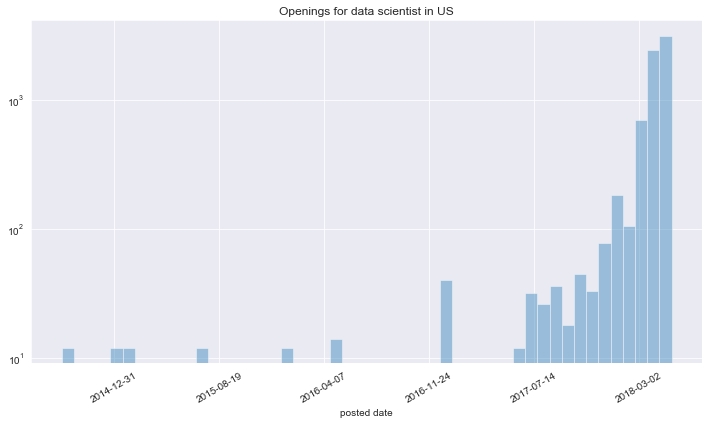

In [5]:
key = 'data scientist'
mask = (df["title"].str.contains(key, case=False)) & \
       (df["country"] == "USA")
    
dates = pd.to_datetime(df["posted_date"][mask], errors='coerce')
ax = sns.distplot(pd.to_numeric(dates[~pd.isna(dates)]), kde=False, hist_kws={'log':True});
ax.set_xticklabels(pd.to_datetime(ax.get_xticks()).date, rotation=30);
ax.set_xlabel("posted date");
plt.title("Openings for data scientist in US");
plt.tight_layout();
plt.savefig("./plots/openings_time.pdf", dpi=100);

# Job posted : company dependency
<a id='plot3'></a>

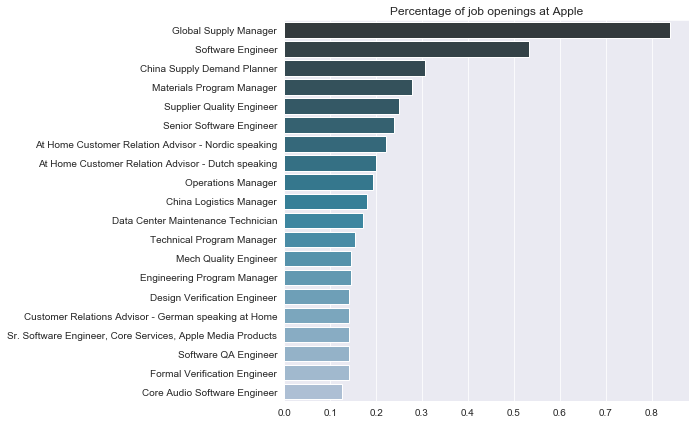

In [6]:
mask = df["brand"].str.contains('apple', case=False, na=False)
d = (df[mask].groupby("title")["title"]
             .count()
             .sort_values(ascending=False))[:20]
tot_jobs = len(df[mask])
sns.barplot(x=100. * d.values / tot_jobs, y=d.index, palette="PuBuGn_d");
plt.title("Percentage of job openings at Apple");
plt.tight_layout();
plt.ylabel("")
plt.savefig("./plots/perc_openings_apple.pdf", dpi=100);